In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!pip install fastai

In [0]:
root_dir = '/content/gdrive/My Drive/'
base_dir = root_dir + 'DL_datas/'

In [0]:
path = Path(root_dir+ 'DL_datas')
path.mkdir(exist_ok=True)

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [7]:
doc(untar_data)

In [10]:
path = untar_data('https://www.kaggle.com/prasunroy/natural-images/download', dest=base_dir); path

ReadError: ignored

In [11]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [12]:
from zipfile import ZipFile
with ZipFile('https://www.kaggle.com/prasunroy/natural-images/download', 'r') as archive:
  archive.extractall(base_dir)

FileNotFoundError: ignored

In [6]:
!pip install kaggle

In [0]:
import os
import json
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/fastai-v3/.kaggle/"

In [8]:
!pwd

/content


In [0]:
os.chdir('/content/gdrive/My Drive/DL_datas')

In [10]:
!kaggle datasets download -d prasunroy/natural-images 

natural-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
!unzip natural-images.zip

Archive:  natural-images.zip
  inflating: data/natural_images/airplane/airplane_0000.jpg  
  inflating: data/natural_images/airplane/airplane_0001.jpg  
  inflating: data/natural_images/airplane/airplane_0002.jpg  
  inflating: data/natural_images/airplane/airplane_0003.jpg  
  inflating: data/natural_images/airplane/airplane_0004.jpg  
  inflating: data/natural_images/airplane/airplane_0005.jpg  
  inflating: data/natural_images/airplane/airplane_0006.jpg  
  inflating: data/natural_images/airplane/airplane_0007.jpg  
  inflating: data/natural_images/airplane/airplane_0008.jpg  
  inflating: data/natural_images/airplane/airplane_0009.jpg  
  inflating: data/natural_images/airplane/airplane_0010.jpg  
  inflating: data/natural_images/airplane/airplane_0011.jpg  
  inflating: data/natural_images/airplane/airplane_0012.jpg  
  inflating: data/natural_images/airplane/airplane_0013.jpg  
  inflating: data/natural_images/airplane/airplane_0014.jpg  
  inflating: data/natural_images/airplane

In [15]:
path = Path('/content/gdrive/My Drive/DL_datas/data/natural_images'); path

PosixPath('/content/gdrive/My Drive/DL_datas/data/natural_images')

In [12]:
path.ls()

[PosixPath('/content/gdrive/My Drive/DL_datas/data/natural_images/airplane'),
 PosixPath('/content/gdrive/My Drive/DL_datas/data/natural_images/car'),
 PosixPath('/content/gdrive/My Drive/DL_datas/data/natural_images/cat'),
 PosixPath('/content/gdrive/My Drive/DL_datas/data/natural_images/dog'),
 PosixPath('/content/gdrive/My Drive/DL_datas/data/natural_images/flower'),
 PosixPath('/content/gdrive/My Drive/DL_datas/data/natural_images/fruit'),
 PosixPath('/content/gdrive/My Drive/DL_datas/data/natural_images/motorbike'),
 PosixPath('/content/gdrive/My Drive/DL_datas/data/natural_images/person')]

In [21]:
items = ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']
fnames =[]
for item in items:
  fnames += get_image_files(path/item)
fnames[:5]

[PosixPath('/content/gdrive/My Drive/DL_datas/data/natural_images/airplane/airplane_0020.jpg'),
 PosixPath('/content/gdrive/My Drive/DL_datas/data/natural_images/airplane/airplane_0007.jpg'),
 PosixPath('/content/gdrive/My Drive/DL_datas/data/natural_images/airplane/airplane_0005.jpg'),
 PosixPath('/content/gdrive/My Drive/DL_datas/data/natural_images/airplane/airplane_0032.jpg'),
 PosixPath('/content/gdrive/My Drive/DL_datas/data/natural_images/airplane/airplane_0003.jpg')]

In [0]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=tfms, size=300, bs=32)

In [18]:
doc(get_image_files)

In [26]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5520 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: /content/gdrive/My Drive/DL_datas/data/natural_images;

Valid: LabelList (1379 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
car,cat,airplane,flower,person
Path: /content/gdrive/My Drive/DL_datas/data/natural_images;

Test: None

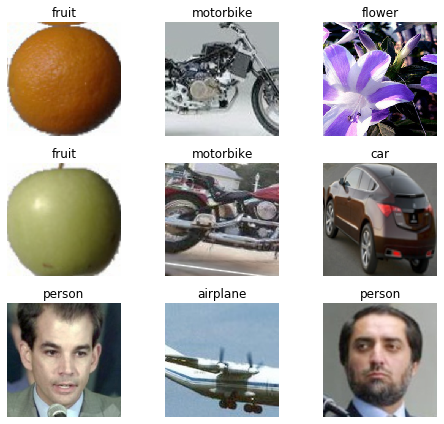

In [27]:
data.show_batch(rows=3, figsize=(7,6))

In [28]:
print(data.classes)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


In [32]:
learner = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 68.8MB/s]


In [34]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.145069,0.016733,0.003626,13:58
1,0.080628,0.011028,0.005076,01:51
2,0.037360,0.007602,0.002175,01:50
3,0.037334,0.008023,0.003626,01:53


In [0]:
learner.save('stage-1')

In [36]:
interp = ClassificationInterpretation.from_learner(learner)

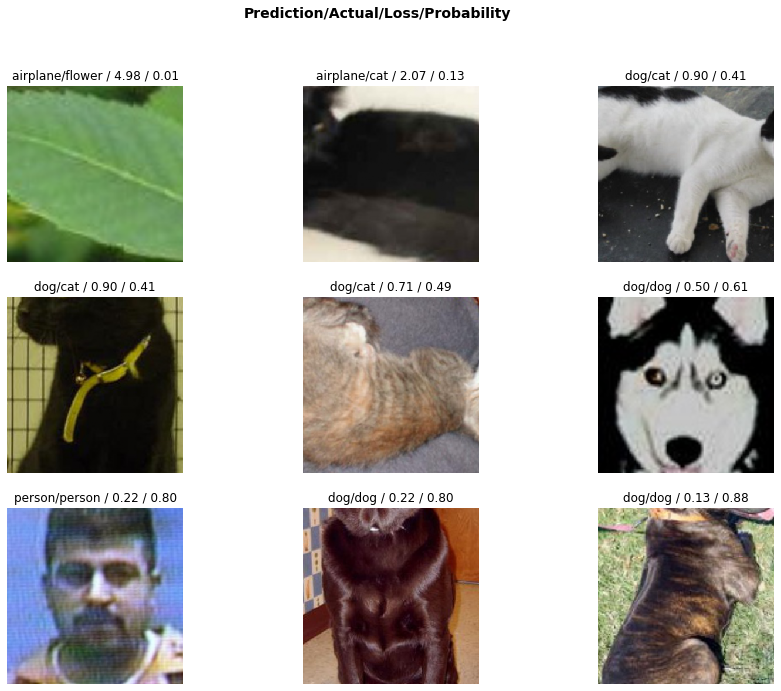

In [37]:
interp.plot_top_losses(9, figsize=(15,11))

In [38]:
interp.most_confused(min_val=2)

[('cat', 'dog', 3)]

In [0]:
learner.unfreeze()

In [41]:
learner.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.129722,0.024129,0.010152,01:50


In [43]:
learner.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5520 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: /content/gdrive/My Drive/DL_datas/data/natural_images;

Valid: LabelList (1379 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
car,cat,airplane,flower,person
Path: /content/gdrive/My Drive/DL_datas/data/natural_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), paddi

In [46]:
learner.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


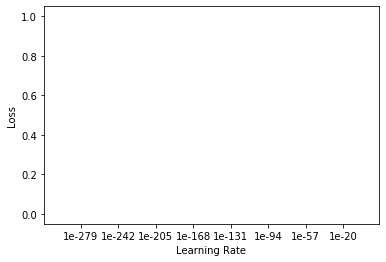

In [45]:
learner.recorder.plot()

In [0]:
learner.unfreeze()
learner.fit_one_cycle(2)